In [1]:
# Notebook config (run this first cell)
from pathlib import Path
import os, sys

BASE = Path(r"C:\Users\Lenovo\Desktop\LY MAJOR PROJECT")   # change if needed
DATA = BASE / "data"
IMAGES = DATA / "images"
POP = DATA / "population"
ROADS = DATA / "roads"
BOUNDARIES = DATA / "boundaries"
PROCESSED = DATA / "processed"
PATCHES = DATA / "patches"
OUTPUTS = BASE / "outputs"

# Create folders (safe)
for p in [PROCESSED, PATCHES, OUTPUTS, OUTPUTS/"maps", OUTPUTS/"charts"]:
    p.mkdir(parents=True, exist_ok=True)

print("Base:", BASE)
print("Images folder:", IMAGES)


Base: C:\Users\Lenovo\Desktop\LY MAJOR PROJECT
Images folder: C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data\images


In [3]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import os

model_path = r"C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data\models\urban_growth_unet.h5"
model = load_model(model_path)

predictions_dir = r"C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data\predictions"
preds_file = os.path.join(predictions_dir, "test_predictions.npz")
data = np.load(preds_file)
preds, y_test = data["predictions"], data["ground_truth"]


In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score

y_true_flat = y_test.flatten() > 0.5
y_pred_flat = preds.flatten() > 0.5

acc = accuracy_score(y_true_flat, y_pred_flat)
prec = precision_score(y_true_flat, y_pred_flat)
rec = recall_score(y_true_flat, y_pred_flat)
f1 = f1_score(y_true_flat, y_pred_flat)
iou = jaccard_score(y_true_flat, y_pred_flat)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"IoU: {iou:.4f}")


Accuracy: 0.9919
Precision: 0.9772
Recall: 0.9961
F1-Score: 0.9865
IoU: 0.9735


In [6]:
import random

n = 5
idxs = random.sample(range(len(preds)), n)

plt.figure(figsize=(15, 9))
for i, idx in enumerate(idxs):
    plt.subplot(3, n, i + 1)
    plt.imshow(y_test[idx, :, :, 0], cmap='gray')
    plt.title("Ground Truth")
    plt.axis('off')

    plt.subplot(3, n, n + i + 1)
    plt.imshow(preds[idx, :, :, 0], cmap='gray')
    plt.title("Predicted Mask")
    plt.axis('off')

    plt.subplot(3, n, 2 * n + i + 1)
    diff = np.abs(y_test[idx, :, :, 0] - preds[idx, :, :, 0])
    plt.imshow(diff, cmap='hot')
    plt.title("Difference")
    plt.axis('off')

plt.suptitle("Model Evaluation Visualization", fontsize=16)
plt.tight_layout()
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7024\975123403.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [6]:
#

In [23]:
# Notebook config (run this first cell)
from pathlib import Path
import os, sys

BASE = Path(r"C:\Users\Lenovo\Desktop\LY MAJOR PROJECT")
DATA = BASE / "data"
IMAGES = DATA / "images"
POP = DATA / "population"
ROADS = DATA / "roads"
BOUNDARIES = DATA / "boundaries"
PROCESSED = DATA / "processed"
PATCHES = DATA / "patches"
OUTPUTS = BASE / "outputs"

for p in [PROCESSED, PATCHES, OUTPUTS, OUTPUTS/"maps", OUTPUTS/"charts"]:
    p.mkdir(parents=True, exist_ok=True)

print("Base:", BASE)


Base: C:\Users\Lenovo\Desktop\LY MAJOR PROJECT


In [24]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score
import random

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [25]:
test_path = PROCESSED / "test.npz"
data = np.load(test_path)
X_test = data["X"]

print("Test data shape:", X_test.shape)


Test data shape: (430, 64, 64, 7)


In [26]:
model_path = PROCESSED / "autoencoder_model.h5"

if not model_path.exists():
    raise FileNotFoundError(f"❌ Model not found at {model_path}")

print("✅ Loading model from:", model_path)

# FIX: tell Keras what 'mse' means
model = tf.keras.models.load_model(
    model_path,
    custom_objects={"mse": tf.keras.losses.MeanSquaredError()}
)

model.summary()


✅ Loading model from: C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data\processed\autoencoder_model.h5


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 32)     │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 32, 32, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 64, 64, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 7)      │         2,023 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 188,681 (737.04 KB)

 Trainable params: 188,679 (737.03 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [27]:
preds = model.predict(X_test)
print("Predictions shape:", preds.shape)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Predictions shape: (430, 64, 64, 7)


In [28]:
y_true_flat = X_test.flatten() > 0.5
y_pred_flat = preds.flatten() > 0.5

acc = accuracy_score(y_true_flat, y_pred_flat)
prec = precision_score(y_true_flat, y_pred_flat)
rec = recall_score(y_true_flat, y_pred_flat)
f1 = f1_score(y_true_flat, y_pred_flat)
iou = jaccard_score(y_true_flat, y_pred_flat)

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"IoU:       {iou:.4f}")


Accuracy:  0.9974
Precision: 0.9902
Recall:    0.9917
F1-Score:  0.9909
IoU:       0.9820


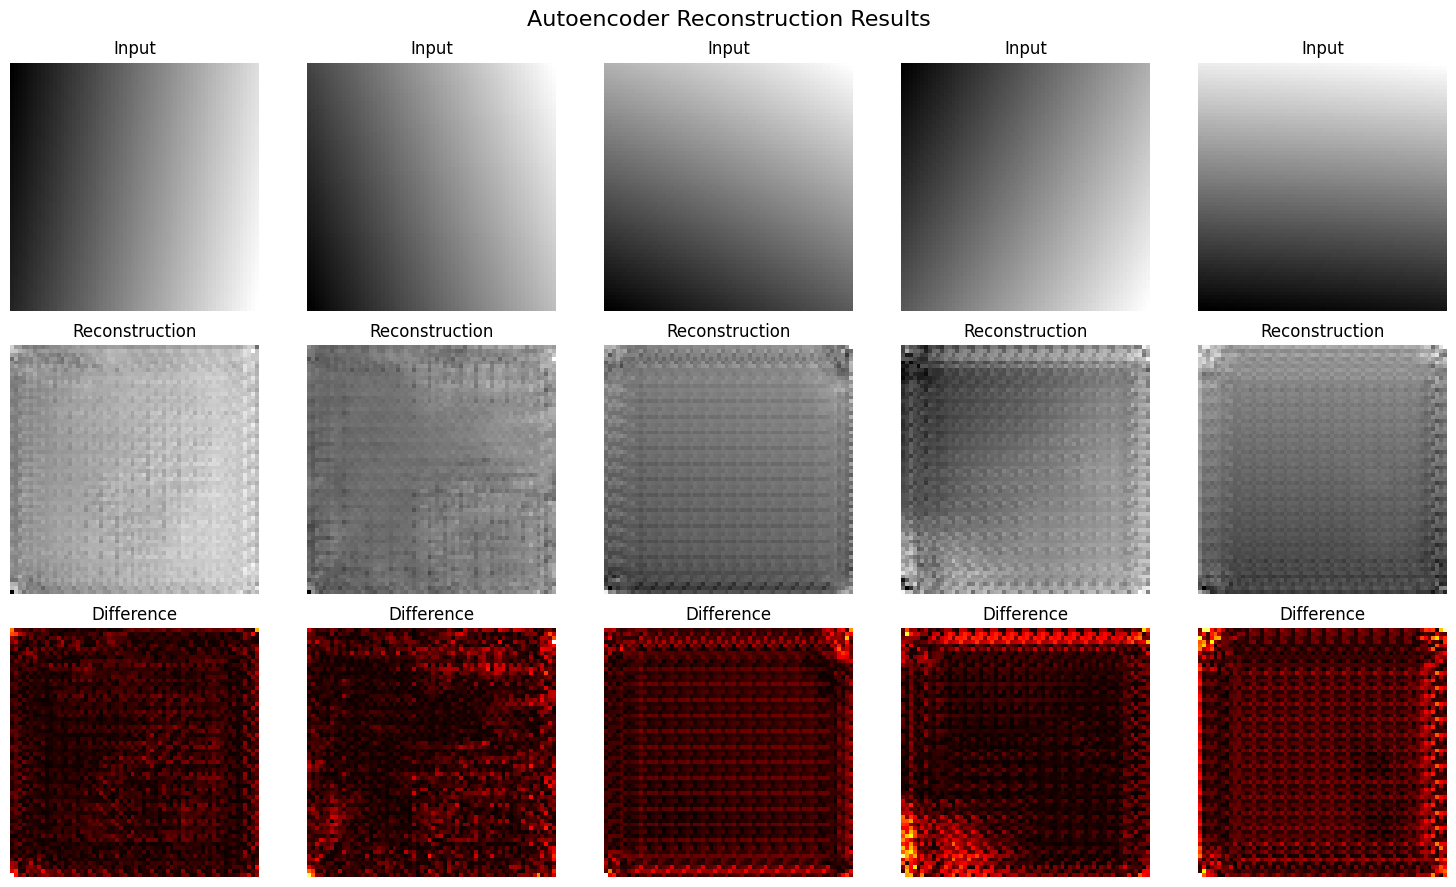

In [29]:
n = 5
idxs = random.sample(range(len(preds)), n)

plt.figure(figsize=(15, 9))
for i, idx in enumerate(idxs):
    plt.subplot(3, n, i + 1)
    plt.imshow(X_test[idx, :, :, 0], cmap='gray')
    plt.title("Input")
    plt.axis('off')

    plt.subplot(3, n, n + i + 1)
    plt.imshow(preds[idx, :, :, 0], cmap='gray')
    plt.title("Reconstruction")
    plt.axis('off')

    plt.subplot(3, n, 2*n + i + 1)
    diff = np.abs(X_test[idx, :, :, 0] - preds[idx, :, :, 0])
    plt.imshow(diff, cmap='hot')
    plt.title("Difference")
    plt.axis('off')

plt.suptitle("Autoencoder Reconstruction Results", fontsize=16)
plt.tight_layout()
plt.show()
